In [1]:
#import the OS for getting the file path
import os, sys
os.getcwd()

'/Users/abhilash/Downloads'

In [2]:
# import the importnant libraries
import numpy as np
import pandas as pd
#data visulazation library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#importing and reading dataset
df=pd.read_csv("Data.csv")
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# find the five number summary
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [6]:
for col in df.columns:
    print(col,"-->",df[col].unique())

destination --> ['No Urgent Place' 'Home' 'Work']
passanger --> ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather --> ['Sunny' 'Rainy' 'Snowy']
temperature --> [55 80 30]
coupon --> ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration --> ['1d' '2h']
gender --> ['Female' 'Male']
age --> ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus --> ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children --> [1 0]
education --> ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation --> ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social S

# HeatMap for finding Correlation

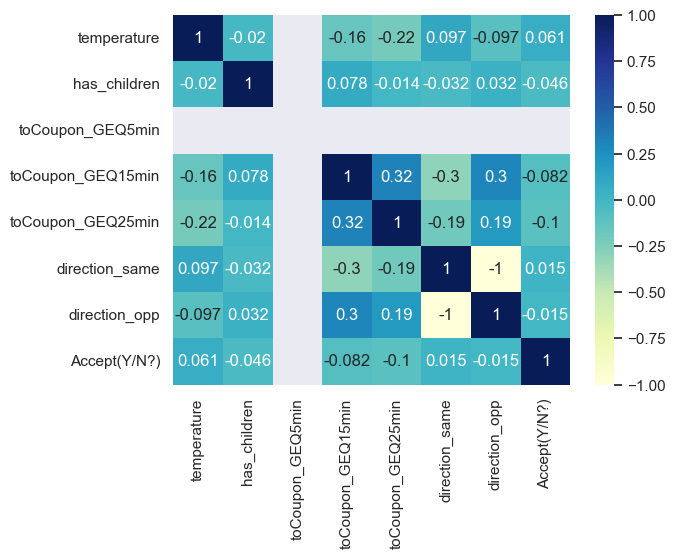

In [7]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fmt='.2g')
plt.show()

In [8]:
df.shape

(12684, 25)

# EDA(Exploratory Data Analysis)

In [9]:
data=df['Accept(Y/N?)'].value_counts()
data

1    7210
0    5474
Name: Accept(Y/N?), dtype: int64

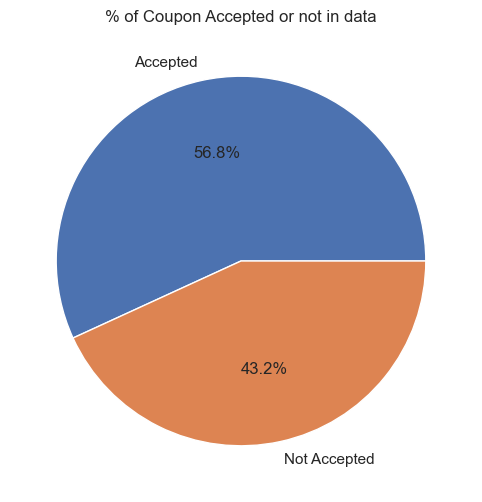

In [10]:
plt.figure(figsize=(10,6))
plt.pie(data,labels=['Accepted','Not Accepted'], autopct='%.1f%%')
plt.title("% of Coupon Accepted or not in data")
plt.show()

In [11]:
# simple script to change values in a few columns
cols_that_need_wrangling = ['temperature', 'Bar',  'CoffeeHouse',  'CarryAway', 'RestaurantLessThan20','Restaurant20To50']

d_temp = {55:'Low',80:'High', 30:'Medium'}
d_bar = {'less1':'Atmost 1', '1~3':'1 to 3','gt8':'Greater than 8' ,'4~8':'4 to 8', 'never':'never'}
d_CoffeeHouse = {'less1':'Atmost 1', '1~3':'1 to 3','gt8':'Greater than 8' , '4~8':'4 to 8','never':'never'}
d_CarryAway = {'less1':'Atmost 1', '1~3':'1 to 3','gt8':'Greater than 8','4~8':'4 to 8','never':'never'}
d_RestaurantLessThan20 = {'less1':'Atmost 1', '1~3':'1 to 3','gt8':'Greater than 8', '4~8':'4 to 8','never':'never'}
d_Restaurant20To50 = {'less1':'Atmost 1', '1~3':'1 to 3','gt8':'Greater than 8' , '4~8':'4 to 8','never':'never'}
mapping = [d_temp ,d_bar,d_CoffeeHouse,d_CarryAway,d_RestaurantLessThan20,d_Restaurant20To50]
for column,d in zip(cols_that_need_wrangling,mapping):
    df[column] = df[column].map(d)

df.expiration.replace({'1d':'24h'},inplace=True)

In [12]:
ordinal_columns = ['temperature','expiration','age','income','RestaurantLessThan20','Restaurant20To50']

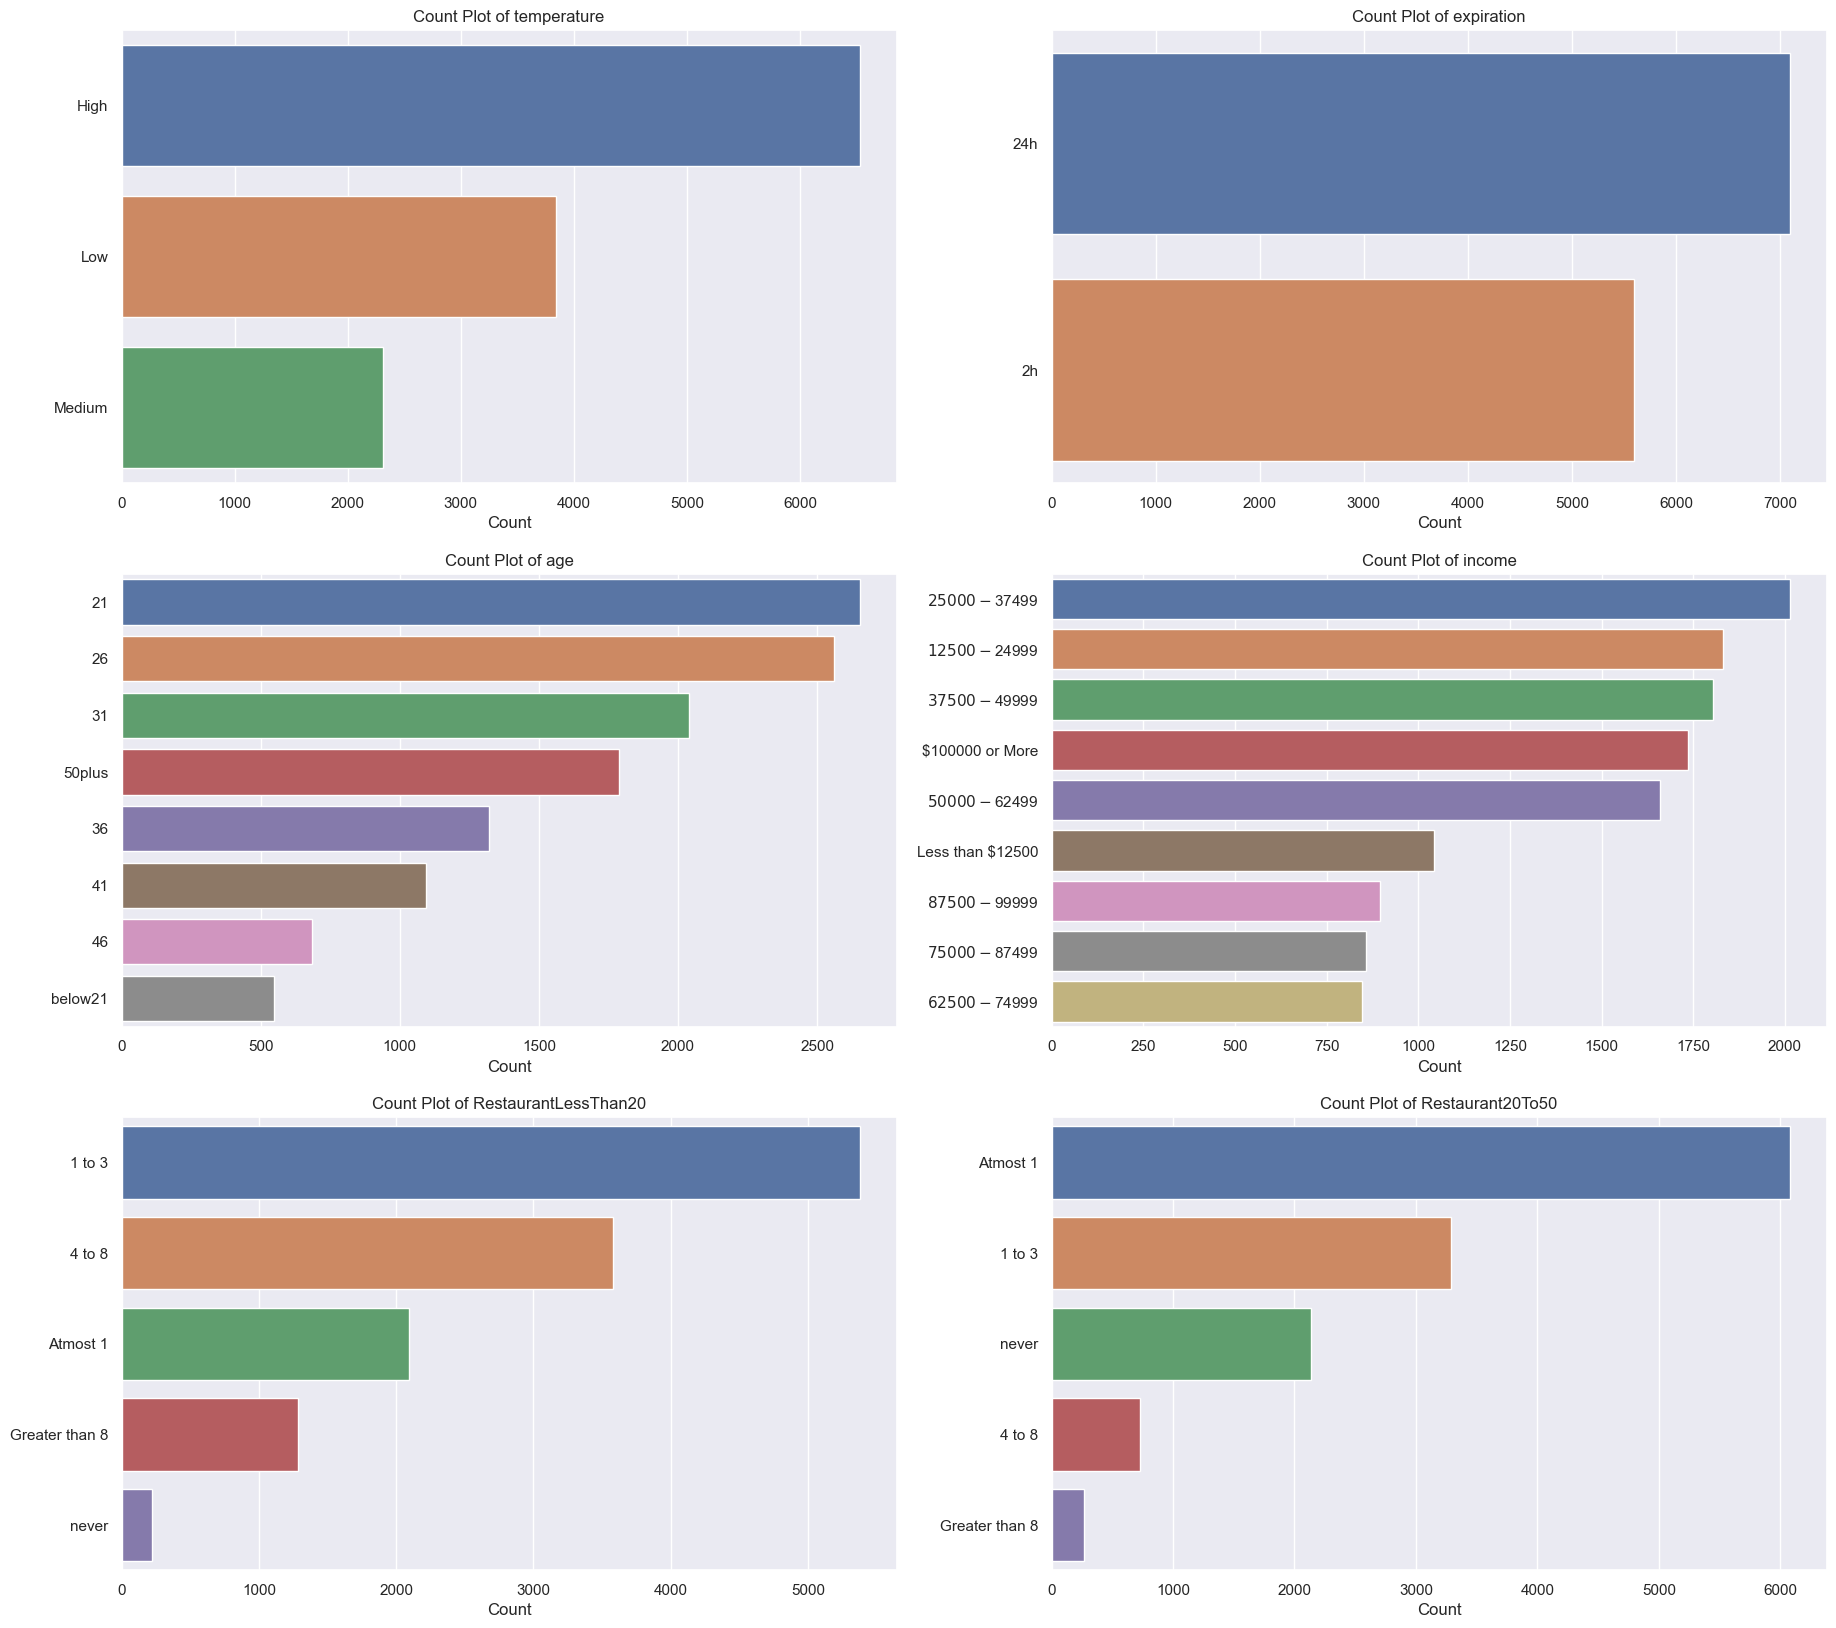

In [13]:
def count_plotter(nrows, ncols,figsize,cols_to_plot):
    
    fig,ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=figsize)  
    ax = ax.flatten()
    i = 0
    for col in df.columns:
        if col in cols_to_plot and col!='Accept(Y/N?)':  # we don't want to see distribution of target variable
            if df[col].dtype==np.int64:   # Any numeric column is converted to categorical first for plotting countplots
                df[col] = df[col].astype(str)
            temp = df[col].value_counts()
            sns.barplot(x=temp.values,y=temp.index,ax=ax[i])
            ax[i].set_xlabel('Count')
            ax[i].set_title('Count Plot of {}'.format(col))
            # plt.show()
            i += 1
count_plotter(nrows=3, ncols=2,figsize=(22,20),cols_to_plot=ordinal_columns)

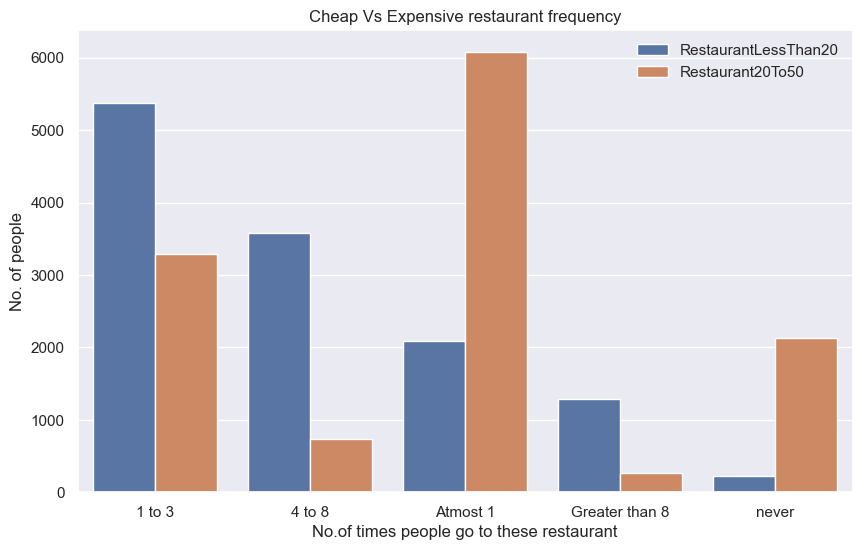

In [14]:
cheap = df['RestaurantLessThan20'].value_counts()
exp = df['Restaurant20To50'].value_counts()
combine = pd.merge(cheap,exp,left_index=True,right_index=True).reset_index()   
final = pd.melt(combine,id_vars=['index'], value_vars=['RestaurantLessThan20','Restaurant20To50'])  

# plotting
plt.figure(figsize=(10,6))
sns.barplot(data=final,x='index',y='value',hue='variable')
plt.xlabel("No.of times people go to these restaurant")
plt.ylabel("No. of people")
plt.title("Cheap Vs Expensive restaurant frequency")
plt.legend(frameon=False,loc='upper right')
plt.show()

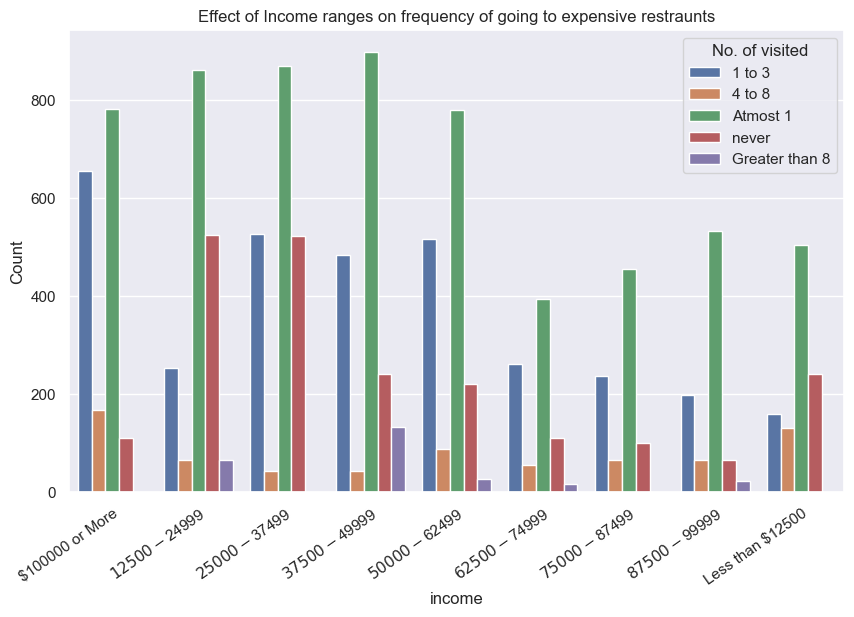

In [15]:
temp = pd.DataFrame(df.groupby(['income','Restaurant20To50']).size()).reset_index()
temp.columns = ['income','Restaurant20To50','values']
plt.figure(figsize=(10,6))
sns.barplot(x='income',y='values',hue='Restaurant20To50',data=temp)
plt.xticks(rotation = 35,rotation_mode = "anchor",ha = "right")
plt.ylabel("Count")
plt.title("Effect of Income ranges on frequency of going to expensive restraunts")
plt.legend(title="No. of visited",loc='upper right')
plt.show()

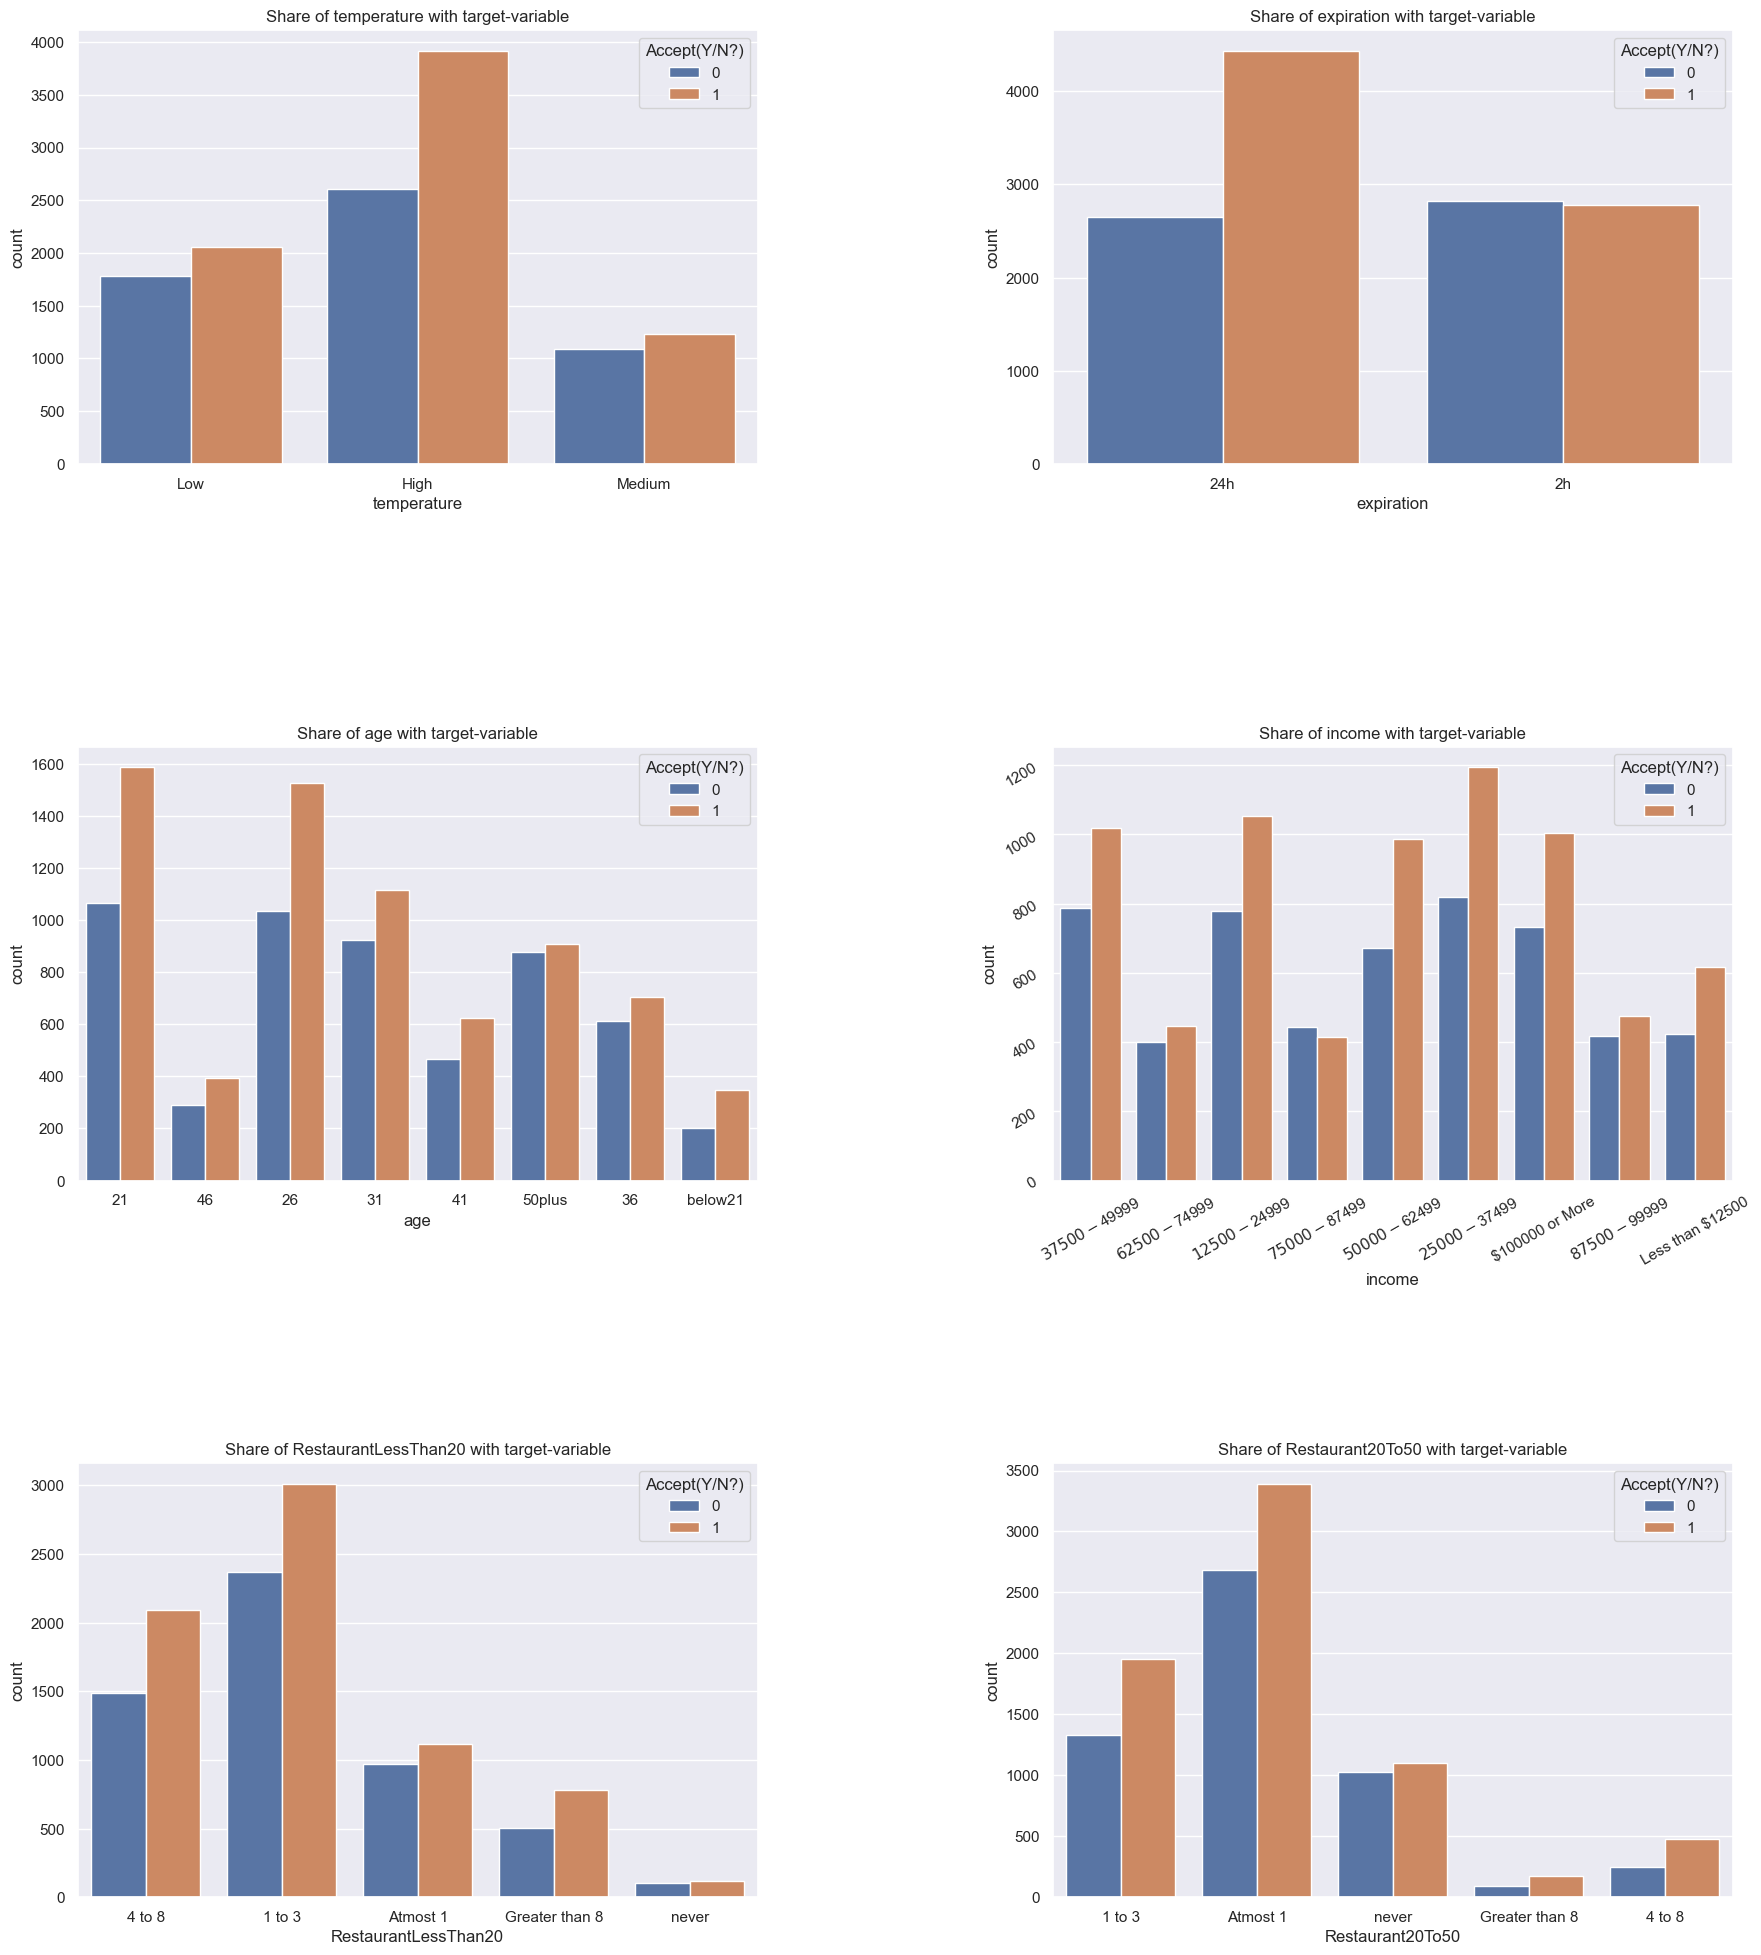

In [16]:
def freq_with_target(nrows,ncols,figsize,cols_to_plot,subplot_to_rotate='',rotate_labels=False,deg=30,sharex=False,sharey=False):
    fig,ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=figsize,sharex=sharex,sharey=sharey)
    ax = ax.flatten()
    # increase space for large ticklabels
    if rotate_labels:
        fig.tight_layout(pad=15.0)
    i = 0
    for col in df.columns:
        if col in cols_to_plot and col!='Accept(Y/N?)':
            sns.countplot(x=col,data=df,ax=ax[i],hue='Accept(Y/N?)')
            ax[i].set_title('Share of {} with target-variable'.format(col))
            # rotation is needed wherever tick-labels are large
            if rotate_labels and col==subplot_to_rotate:
                ax[i].tick_params(labelrotation=deg)   
            i += 1
freq_with_target(nrows=3, ncols=2,figsize=(22,24),cols_to_plot=ordinal_columns,subplot_to_rotate='income',rotate_labels=True)

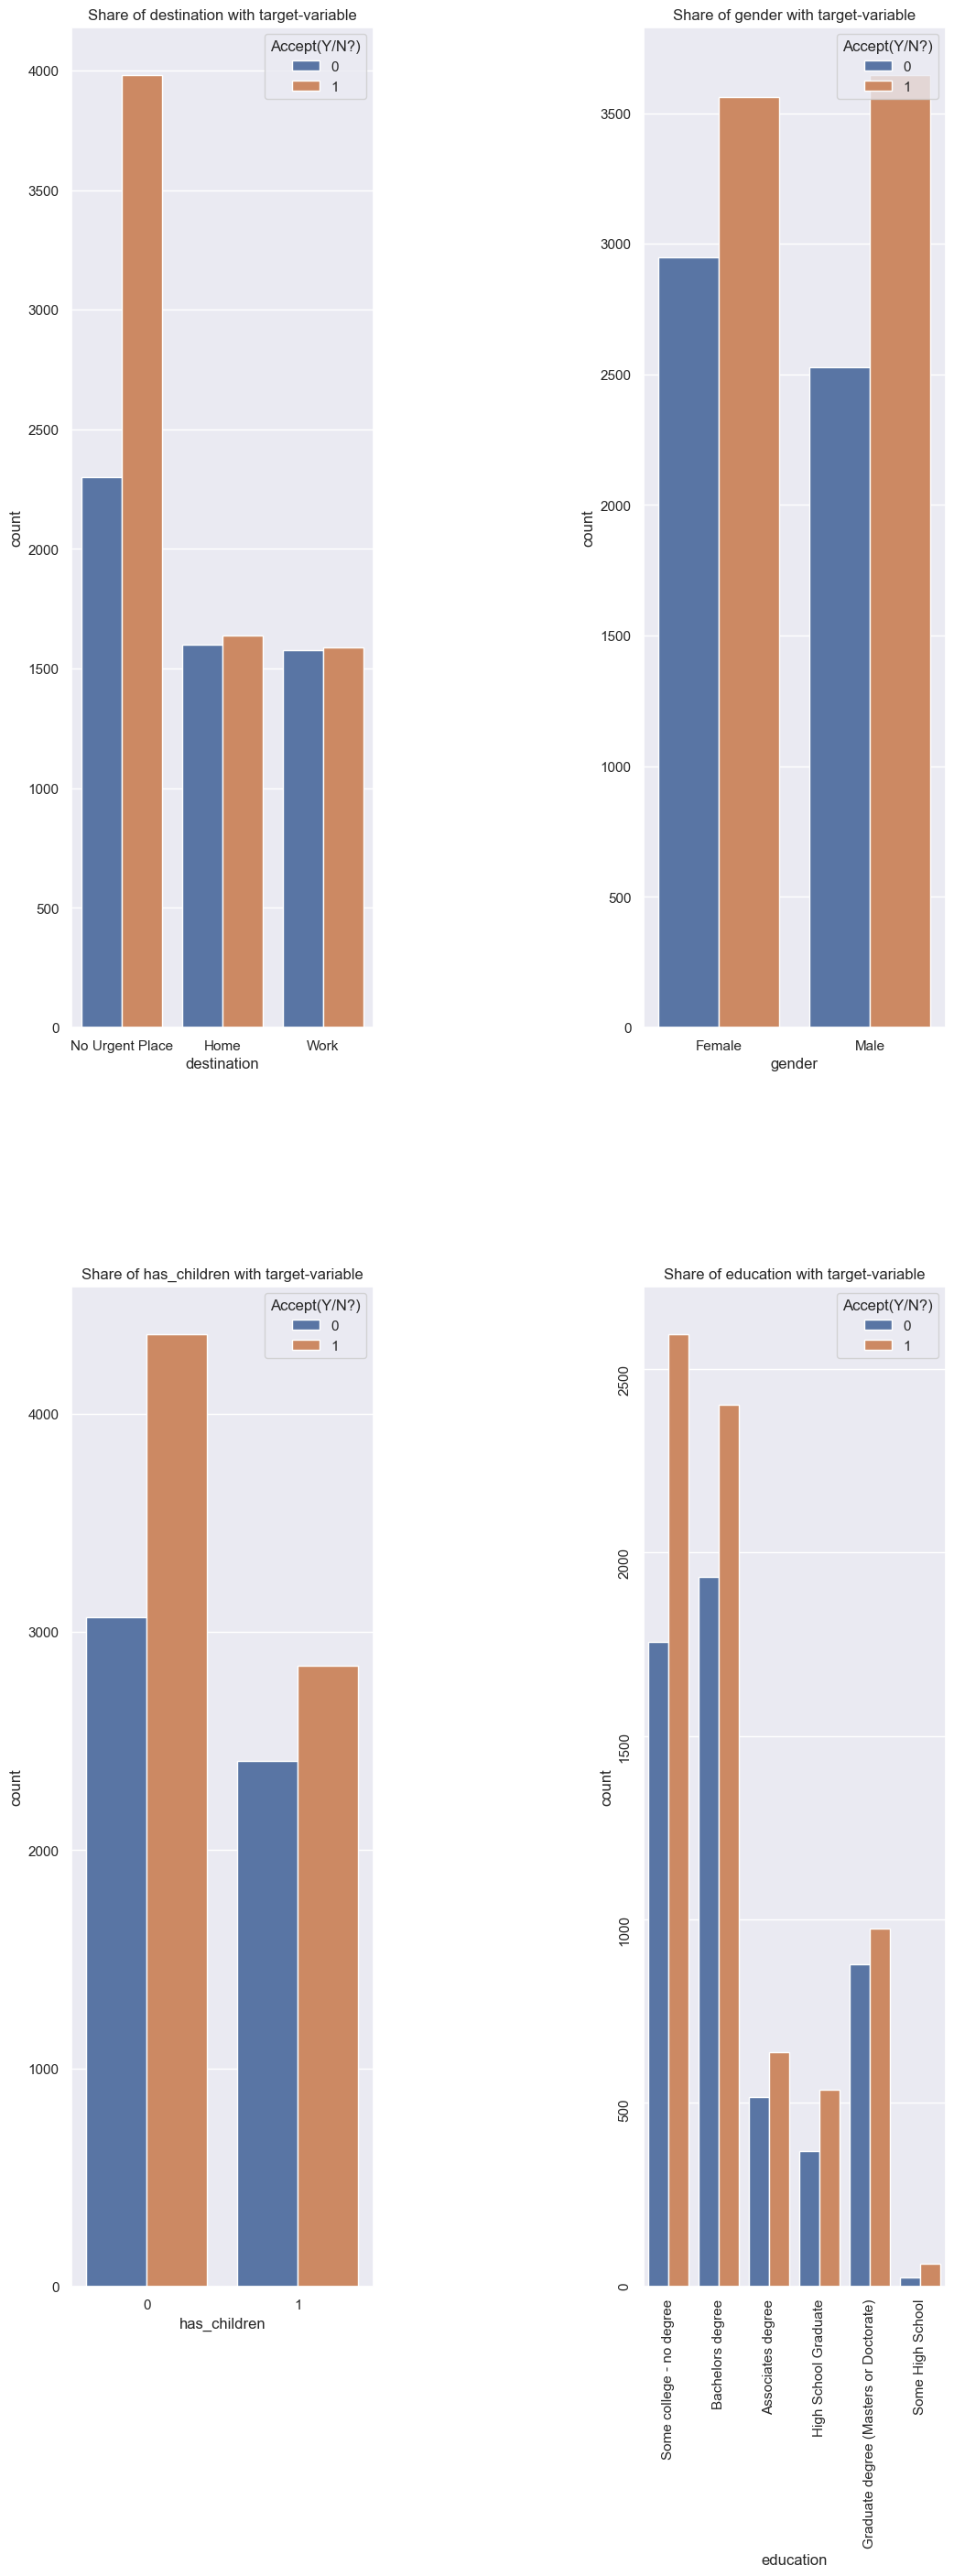

In [17]:
freq_with_target(nrows=2, ncols=2,figsize=(15,30),cols_to_plot=['education', 'has_children', 'destination', 'gender'],subplot_to_rotate='education',rotate_labels=True,deg=90)
     

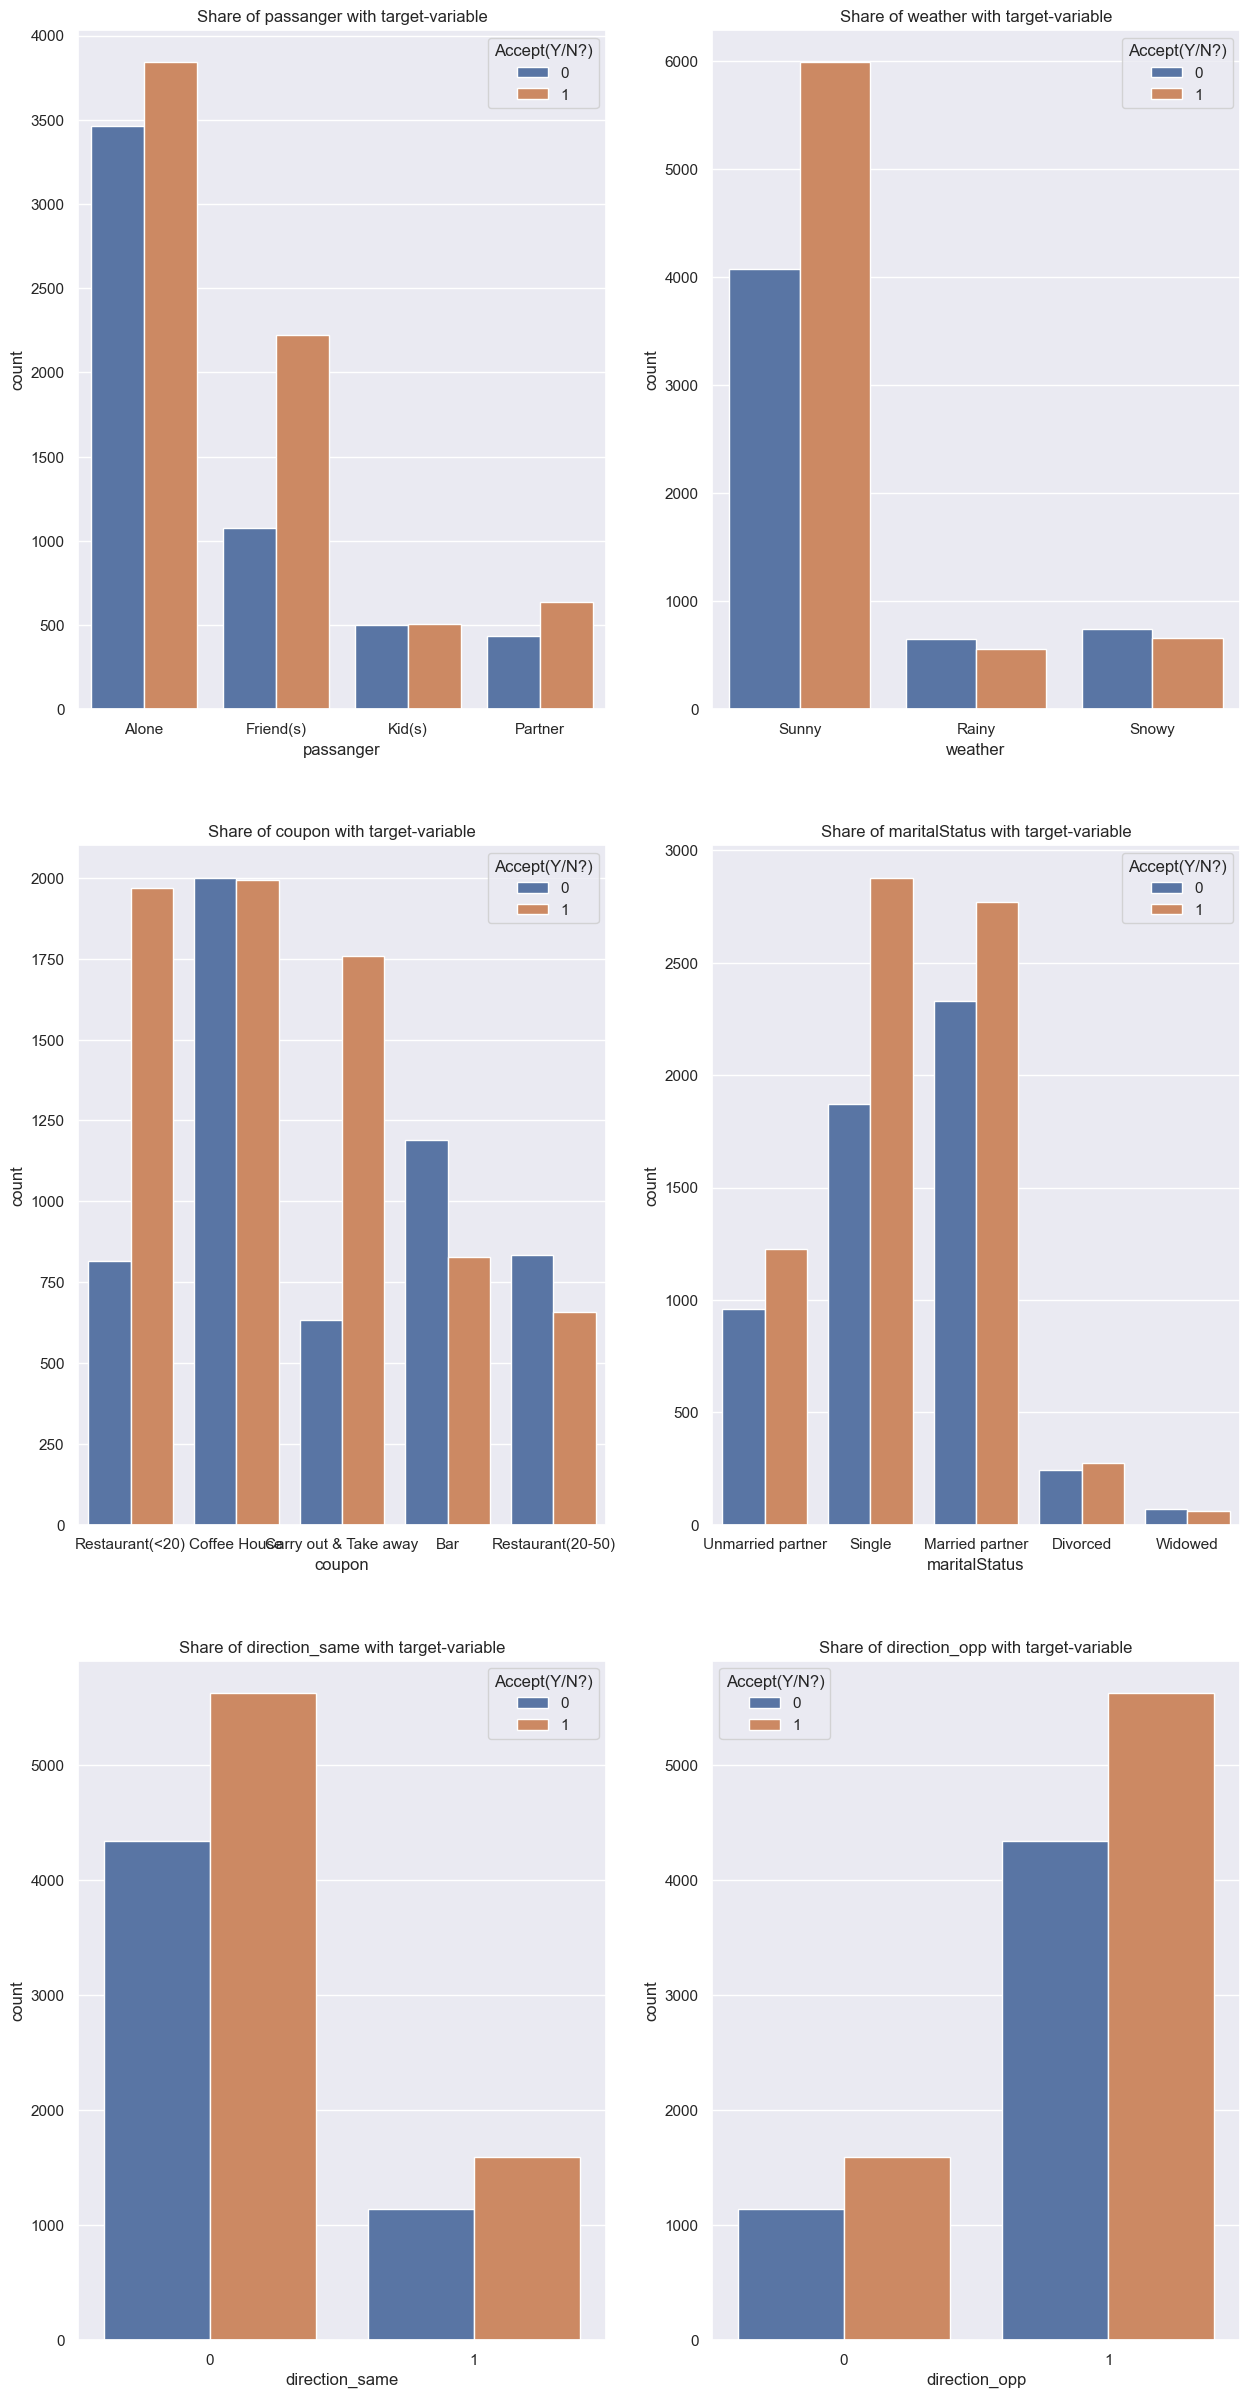

In [18]:
freq_with_target(nrows=3, ncols=2,figsize=(15,30),cols_to_plot=['passanger', 'weather','maritalStatus' , 'direction_opp','direction_same', 'coupon'])

In [19]:
temp = df.copy()

In [20]:
def plot_bivariate(f1,f2,temp,rotate_ticks=False,deg=30):
    temp['feature_comb'] = temp[f1].astype('str') + ' & ' + temp[f2].astype('str') 
    sns.countplot(x='feature_comb',hue='Accept(Y/N?)',data=temp)
    plt.xlabel("Combination of {} & {}".format(f1,f2))
    plt.title("Effect of {} & {} on target variable".format(f1,f2))
    plt.ylabel("")
    if rotate_ticks:
        plt.xticks(rotation=deg)
    plt.legend(labels=['Rejected','Accepted'])
    plt.show()

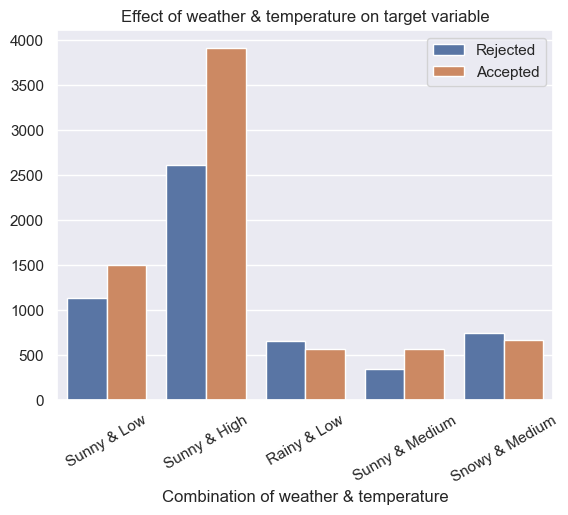

In [21]:
plot_bivariate('weather', 'temperature',temp,rotate_ticks=True,deg=30)

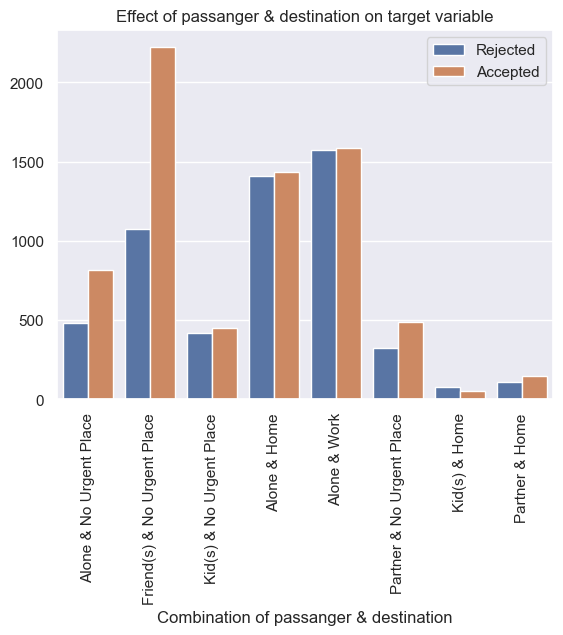

In [22]:
plot_bivariate('passanger', 'destination',temp,rotate_ticks=True,deg=90)

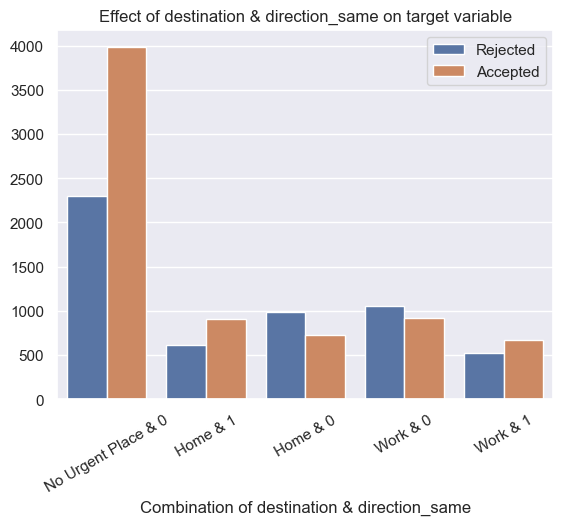

In [23]:
plot_bivariate('destination', 'direction_same',temp,rotate_ticks=True,deg=30)

In [24]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

,missing_count,missing_count %
destination,0,0.000000
passanger,0,0.000000
weather,0,0.000000
temperature,0,0.000000
coupon,0,0.000000
expiration,0,0.000000
gender,0,0.000000
age,0,0.000000
maritalStatus,0,0.000000
has_children,0,0.000000


In [25]:
# mode imputation for missing values in data
df['Bar']=df['Bar'].fillna(df['Bar'].value_counts().index[0])
df['CoffeeHouse']=df['CoffeeHouse'].fillna(df['CoffeeHouse'].value_counts().index[0])
df['CarryAway']=df['CarryAway'].fillna(df['CarryAway'].value_counts().index[0])
df['RestaurantLessThan20']=df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].value_counts().index[0])
df['Restaurant20To50']=df['Restaurant20To50'].fillna(df['Restaurant20To50'].value_counts().index[0])

In [26]:
df.duplicated().sum()

291

In [27]:
df = df.drop_duplicates(keep="first")


In [28]:
# let's drop direction_same as it's perfectly correlated with direction_opp
df.drop(columns=['direction_opp','car','gender'],axis=1,inplace=True)

In [29]:

def custom_where(ele):
    x,y,z = list(map(str,ele))
    if x == '1':
        if y=='1':
            if z=='1':
                return 'within 25mins'
            else:
                return 'within 15mins'
        else:
            return 'within 5mins'

In [30]:
df['driving_distance'] = df[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].apply(custom_where,axis=1,raw=True)
df.drop(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],axis=1,inplace=True)

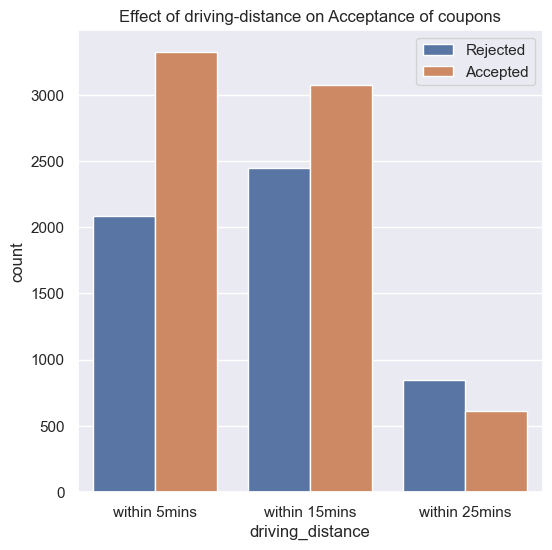

In [31]:

plt.figure(figsize=(6,6))
sns.countplot(x='driving_distance',data=df,hue='Accept(Y/N?)')
plt.title("Effect of driving-distance on Acceptance of coupons")
plt.legend(labels=['Rejected','Accepted'])
plt.show()

In [32]:
temp = df.copy()

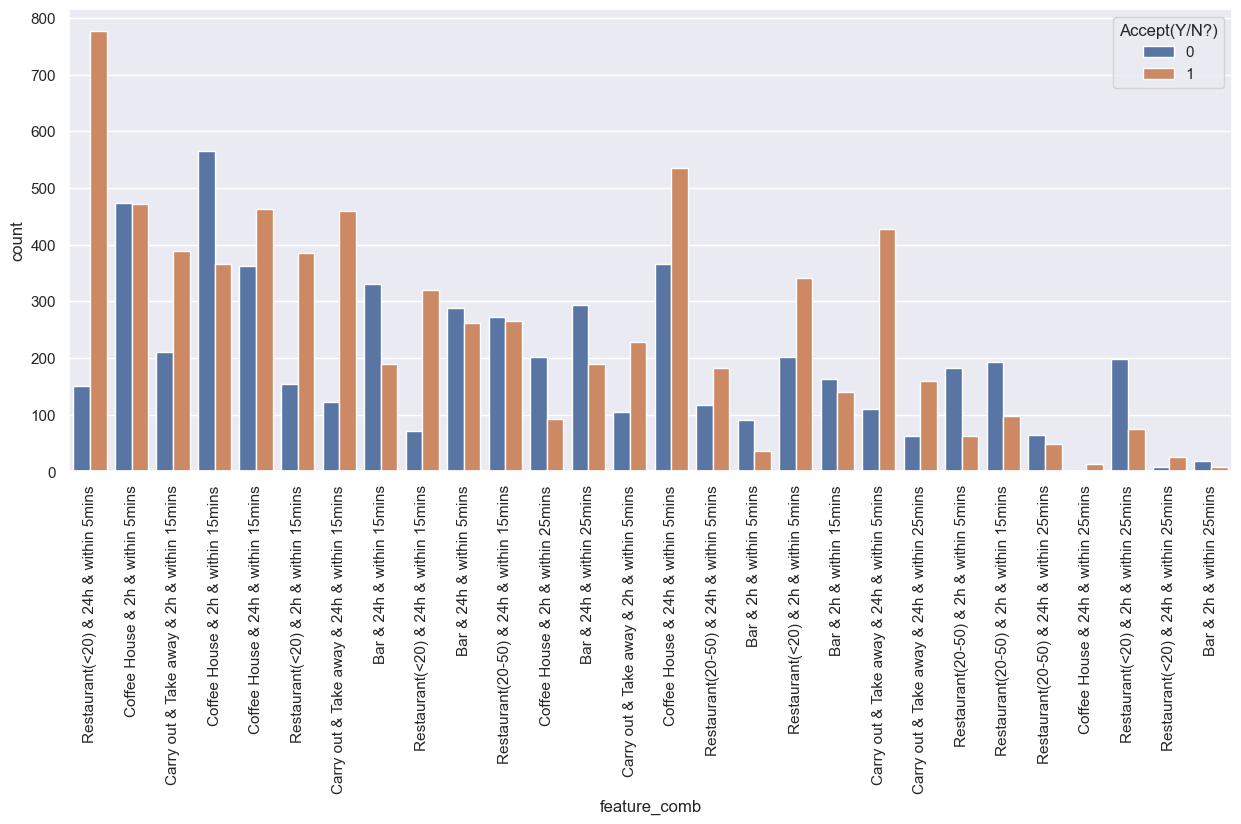

In [33]:

temp['feature_comb'] = temp['coupon'] + ' & ' + temp['expiration'] + ' & ' + temp['driving_distance']
plt.figure(figsize=(15,6))
sns.countplot(x='feature_comb',hue='Accept(Y/N?)',data=temp)
plt.xticks(rotation=90)
plt.show()

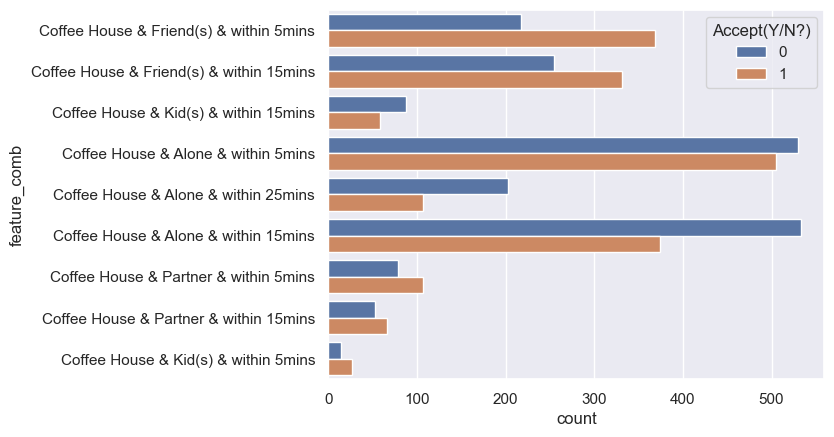

In [34]:
temp['feature_comb'] = temp['coupon'] + ' & ' +temp['passanger'] + ' & ' + temp['driving_distance']
data = temp[temp['coupon']=='Coffee House']
sns.countplot(y='feature_comb',hue='Accept(Y/N?)',data=data)
plt.show()


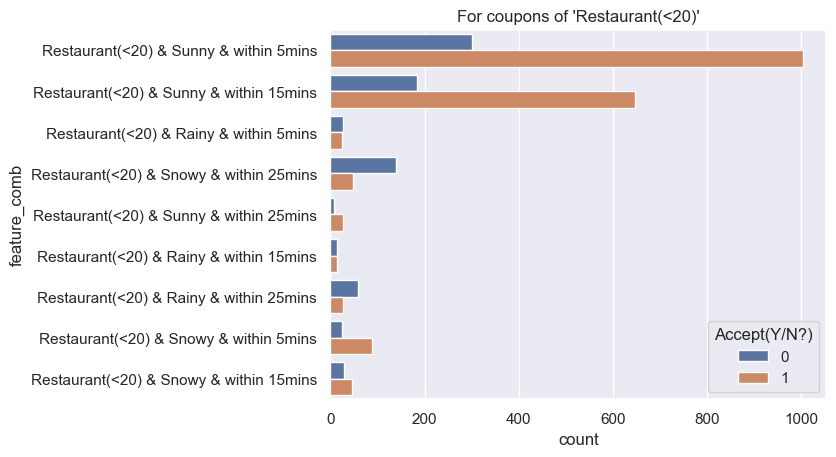

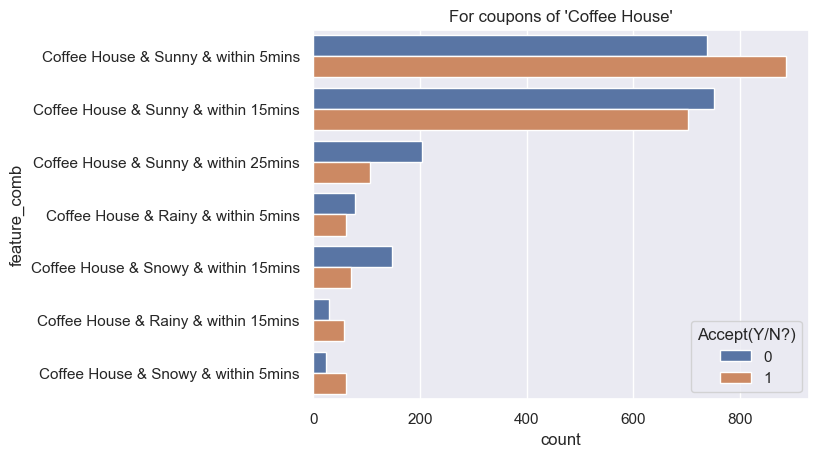

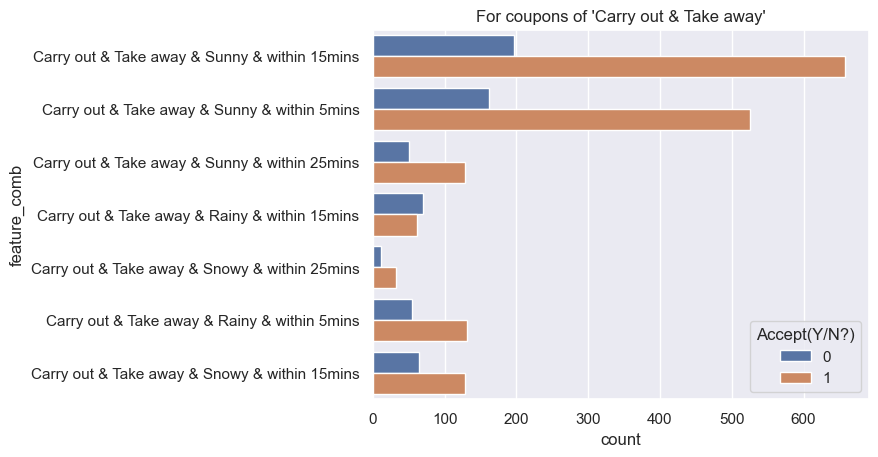

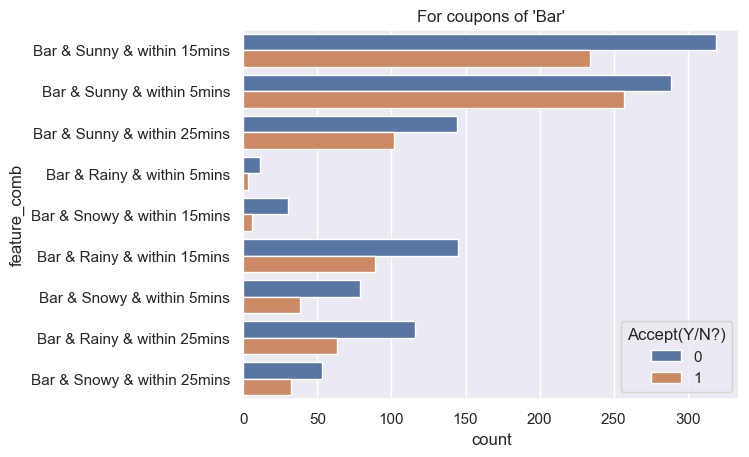

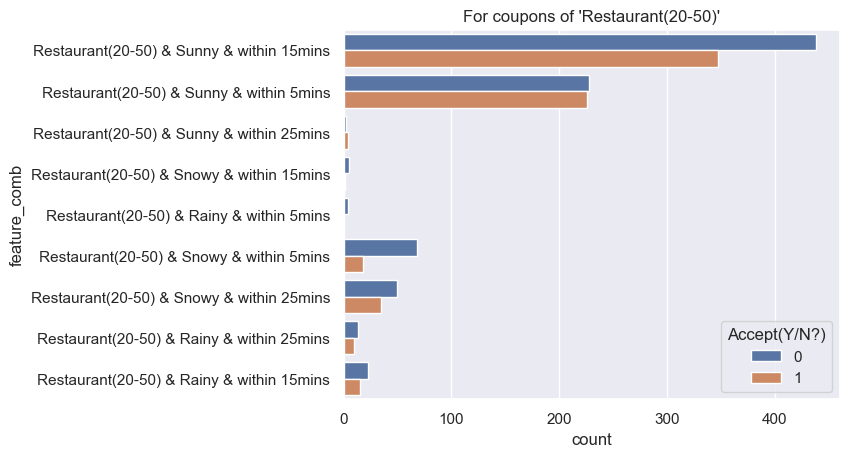

In [35]:

temp['feature_comb'] = temp['coupon'] + ' & ' +temp['weather'] + ' & ' + temp['driving_distance']

# let's show for each coupon for interpretability
for cp in temp.coupon.unique():
    data = temp[temp['coupon']==cp]
    sns.countplot(y='feature_comb',hue='Accept(Y/N?)',data=data)
    plt.title("For coupons of \'{}\'".format(cp))
    plt.show()


In [36]:
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

# One Hot Encoder for converting Categorical Variable into Numerical Variable

In [37]:
df1 = pd.get_dummies(df, columns = ['temperature','destination','driving_distance','passanger','weather','coupon','expiration','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])


In [38]:
df1.head()

,has_children,direction_same,Accept(Y/N?),temperature_High,temperature_Low,temperature_Medium,destination_Home,destination_No Urgent Place,destination_Work,driving_distance_within 15mins,...,RestaurantLessThan20_1 to 3,RestaurantLessThan20_4 to 8,RestaurantLessThan20_Atmost 1,RestaurantLessThan20_Greater than 8,RestaurantLessThan20_never,Restaurant20To50_1 to 3,Restaurant20To50_4 to 8,Restaurant20To50_Atmost 1,Restaurant20To50_Greater than 8,Restaurant20To50_never
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [39]:
x=df1.drop(['Accept(Y/N?)'],axis=1)

In [40]:
y=df1['Accept(Y/N?)']

In [41]:
x.shape

(12393, 103)

In [42]:
y.shape

(12393,)

# Splitting the data into training and test for building the model and predicting with test data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Algorithms

# 1.Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
target = ['1', '0']

In [46]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
confusion_matrix(y_test, y_pred_test)

array([[1056,  560],
       [ 628, 1474]])

In [50]:
report=classification_report(y_test, y_pred_test,target_names=target, digits=2,  output_dict=True)

In [51]:
print("Training Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("***************"*10)
print("Test Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

Training Accuracy of DecisionTree is 99.41%
******************************************************************************************************************************************************
Test Accuracy of DecisionTree is 68.05%


,1,0,accuracy,macro avg,weighted avg
precision,0.627078,0.724680,0.680473,0.675879,0.682258
recall,0.653465,0.701237,0.680473,0.677351,0.680473
f1-score,0.640000,0.712766,0.680473,0.676383,0.681139
support,1616.000000,2102.000000,0.680473,3718.000000,3718.000000


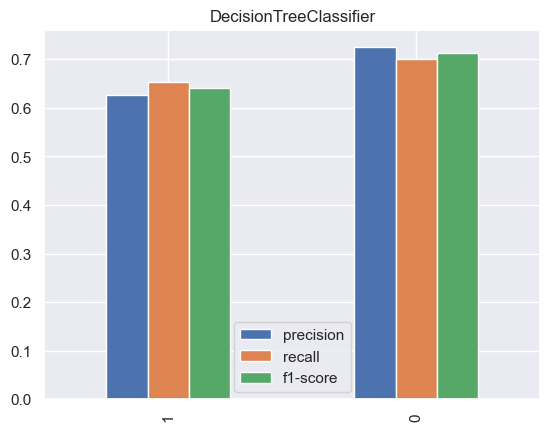

In [52]:
from IPython import display
display.display(pd.DataFrame(report))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('DecisionTreeClassifier')
plt.show()

# 2.Support Vector Machine

In [53]:
from sklearn import svm
svm1=svm.SVC()
svm1=svm1.fit(x_train, y_train)

In [54]:
y_pred_svm_train = svm1.predict(x_train)
y_pred_svm_test = svm1.predict(x_test)

In [55]:
confusion_matrix(y_test, y_pred_svm_test)

array([[1003,  613],
       [ 361, 1741]])

In [56]:
report1=classification_report(y_test, y_pred_svm_test,target_names=target, digits=2,  output_dict=True)

In [57]:
print("Train Accuracy", accuracy_score(y_train, y_pred_svm_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_svm_test))

Train Accuracy 0.8192507204610951
*****************************************************
Test Accuracy 0.7380311995696611


,1,0,accuracy,macro avg,weighted avg
precision,0.735337,0.739592,0.738031,0.737465,0.737743
recall,0.620668,0.828259,0.738031,0.724464,0.738031
f1-score,0.673154,0.781418,0.738031,0.727286,0.734362
support,1616.000000,2102.000000,0.738031,3718.000000,3718.000000


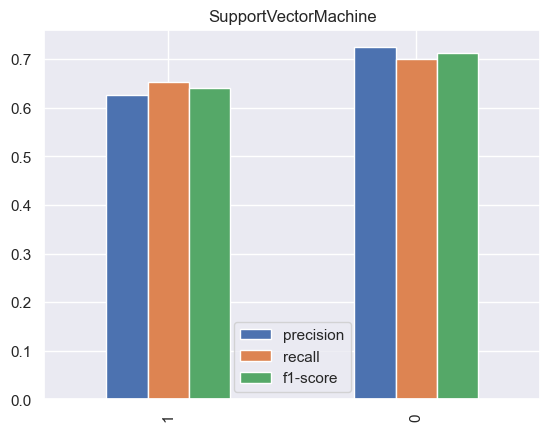

In [58]:
from IPython import display
display.display(pd.DataFrame(report1))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('SupportVectorMachine')
plt.show()

# 3.Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier(n_estimators=1000,criterion='gini',oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [61]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [62]:
confusion_matrix(y_test, y_pred_rf_test)

array([[1031,  585],
       [ 360, 1742]])

In [63]:
report2=classification_report(y_test, y_pred_test,target_names=target, digits=2,  output_dict=True)

In [64]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_rf_train)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_rf_test)*100))

Training Accuracy of RandomForest is 99.41%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 74.58%


,1,0,accuracy,macro avg,weighted avg
precision,0.627078,0.724680,0.680473,0.675879,0.682258
recall,0.653465,0.701237,0.680473,0.677351,0.680473
f1-score,0.640000,0.712766,0.680473,0.676383,0.681139
support,1616.000000,2102.000000,0.680473,3718.000000,3718.000000


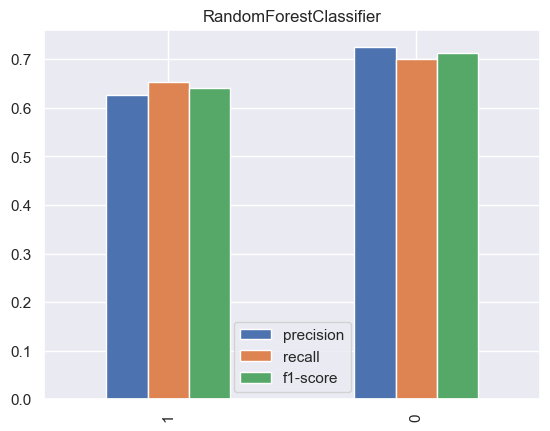

In [65]:
from IPython import display
display.display(pd.DataFrame(report2))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('RandomForestClassifier')
plt.show()

# 4. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_train_lg = log.predict(x_train)
y_test_lg = log.predict(x_test)

In [69]:
confusion_matrix(y_test, y_test_lg)

array([[ 922,  694],
       [ 477, 1625]])

In [70]:
report3=classification_report(y_test, y_test_lg,target_names=target, digits=2,  output_dict=True)

In [71]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_lg)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_lg)*100))

Training Accuracy of Logit is 69.38%
******************************************************************************************************************************************************
Test Accuracy of Logit is 68.50%


,1,0,accuracy,macro avg,weighted avg
precision,0.659042,0.700733,0.685046,0.679888,0.682612
recall,0.570545,0.773073,0.685046,0.671809,0.685046
f1-score,0.611609,0.735128,0.685046,0.673368,0.681441
support,1616.000000,2102.000000,0.685046,3718.000000,3718.000000


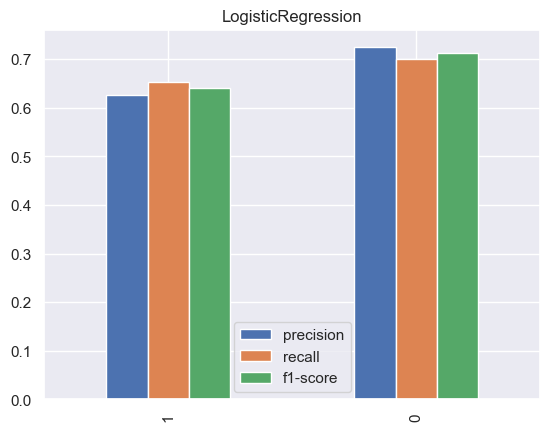

In [72]:
from IPython import display
display.display(pd.DataFrame(report3))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('LogisticRegression')
plt.show()

# 5. KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [74]:
y_train_knn = log.predict(x_train)
y_test_knn = log.predict(x_test)

In [75]:
confusion_matrix(y_test, y_test_knn)

array([[ 922,  694],
       [ 477, 1625]])

In [76]:
report4=classification_report(y_test, y_test_knn,target_names=target, digits=2,  output_dict=True)

In [77]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_knn)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_knn)*100))

Training Accuracy of Logit is 69.38%
******************************************************************************************************************************************************
Test Accuracy of Logit is 68.50%


,1,0,accuracy,macro avg,weighted avg
precision,0.659042,0.700733,0.685046,0.679888,0.682612
recall,0.570545,0.773073,0.685046,0.671809,0.685046
f1-score,0.611609,0.735128,0.685046,0.673368,0.681441
support,1616.000000,2102.000000,0.685046,3718.000000,3718.000000


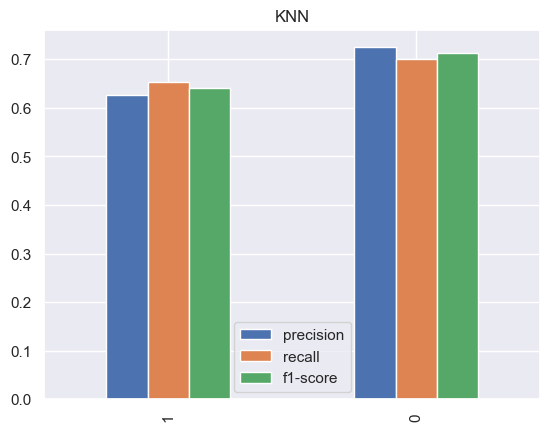

In [78]:
from IPython import display
display.display(pd.DataFrame(report4))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('KNN')
plt.show()

# 6.Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb = gb.fit(x_train, y_train)

In [80]:
y_pred_gb_train =gb.predict(x_train)
y_pred_gb_test = gb.predict(x_test)

In [81]:
confusion_matrix(y_test, y_pred_gb_test)

array([[ 907,  709],
       [ 386, 1716]])

In [82]:
report5=classification_report(y_test, y_pred_gb_test,target_names=target, digits=2,  output_dict=True)

In [83]:
print("Train Accuracy", accuracy_score(y_train, y_pred_gb_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_gb_test))

Train Accuracy 0.7359077809798271
*****************************************************
Test Accuracy 0.7054868208714362


,1,0,accuracy,macro avg,weighted avg
precision,0.701469,0.707629,0.705487,0.704549,0.704952
recall,0.561262,0.816365,0.705487,0.688814,0.705487
f1-score,0.623582,0.758118,0.705487,0.690850,0.699643
support,1616.000000,2102.000000,0.705487,3718.000000,3718.000000


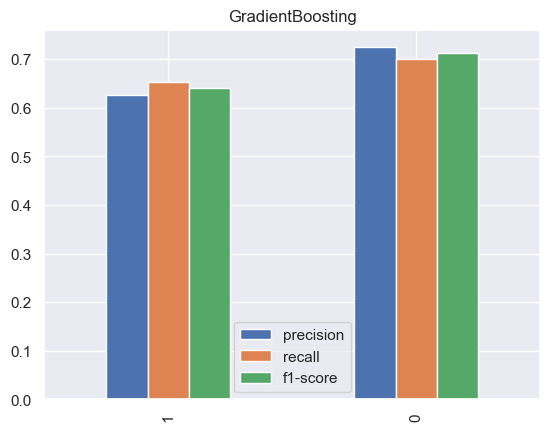

In [84]:
from IPython import display
display.display(pd.DataFrame(report5))
df_cap = pd.DataFrame(report)
df_cap.iloc[:3, :2].T.plot(kind='bar')
plt.title('GradientBoosting')
plt.show()

# ROC-AUC Curve for Above Algorithms

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,log.predict(x_test))

In [86]:
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_DT = RandomForestClassifier(n_estimators=1000,criterion='gini',oob_score=True);
clf_knn= KNeighborsClassifier(n_neighbors=5) 
clf_gb = GradientBoostingClassifier(random_state=1)
clf_svm=svm.SVC()
clf_tree.fit(x_train, y_train); 
clf_reg.fit(x_train, y_train);
clf_DT.fit(x_train, y_train);
clf_knn.fit(x_train, y_train);
clf_gb.fit(x_train, y_train);
clf_svm.fit(x_train, y_train);

In [92]:
y_score1 = clf_tree.predict_proba(x_test)[:,1]
y_score2 = clf_reg.predict_proba(x_test)[:,1]
y_score3 = clf_DT.predict_proba(x_test)[:,1]
y_score4 = clf_knn.predict_proba(x_test)[:,1]
y_score5 = clf_gb.predict_proba(x_test)[:,1]
y_score6 = clf_svm.predict(x_test)

In [93]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)

In [95]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for GB: ', roc_auc_score(y_test, y_score5))
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score6))

roc_auc_score for DecisionTree:  0.6707058223662519
roc_auc_score for Logistic Regression:  0.7351329120780774
roc_auc_score for Random Forest:  0.808656124294637
roc_auc_score for KNN:  0.7292687716083692
roc_auc_score for GB:  0.7670776770826464
roc_auc_score for SVM:  0.7244635589867263


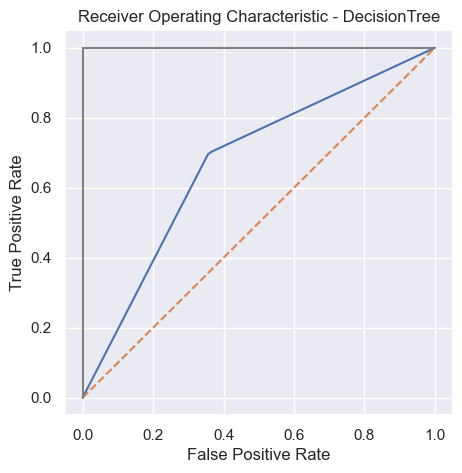

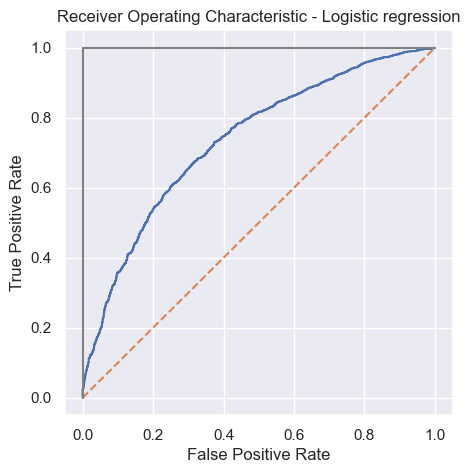

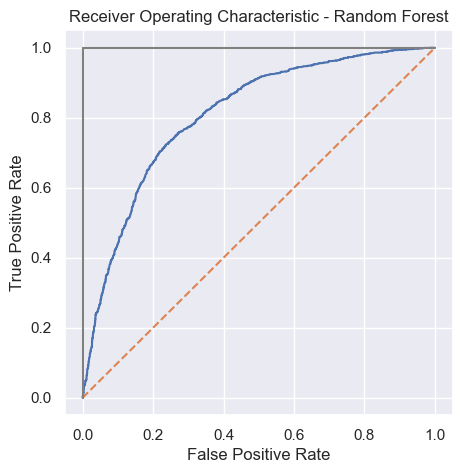

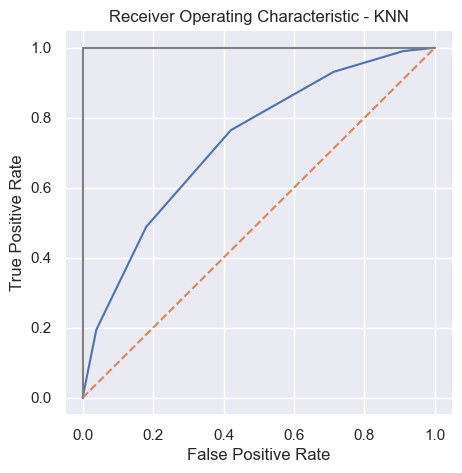

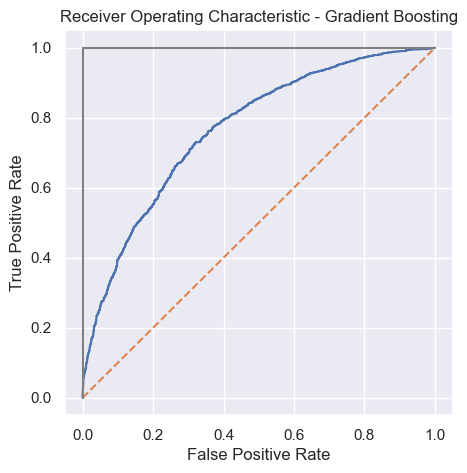

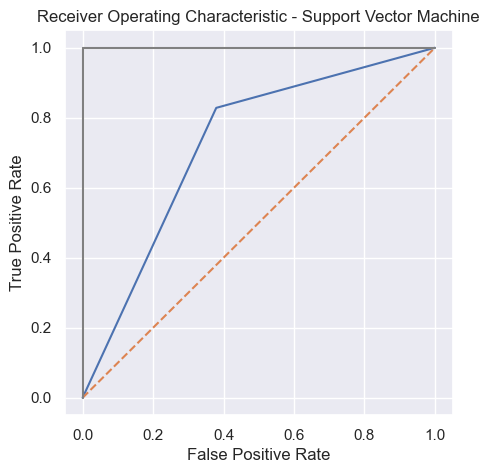

In [100]:
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.plot(false_positive_rate3, true_positive_rate3)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - KNN')
    plt.plot(false_positive_rate4, true_positive_rate4)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Gradient Boosting')
    plt.plot(false_positive_rate5, true_positive_rate5)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Support Vector Machine')
    plt.plot(false_positive_rate6, true_positive_rate6)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [104]:
DT=['Decision Tree',99.41,67.72,67.52]
RF=['Random Forest',99.41,74.29,80.89]
LR=['Logistic Regression',69.38,68.50,73.51]
GB=['Gradient Booster',73.59,70.54,76.70]
SVM=['Support Vector Machine',81.92,73.80,72.44]
KNN=['KNN',69.38,68.50,72.92]
Table=pd.DataFrame([RF,DT,SVM,GB,LR,KNN])
Table.columns=['Model_Name','Training_Accuracy(%)','Testing_Accuracy(%)','roc_auc_score(%)']
Table

,Model_Name,Training_Accuracy(%),Testing_Accuracy(%),roc_auc_score(%)
0,Random Forest,99.41,74.29,80.89
1,Decision Tree,99.41,67.72,67.52
2,Support Vector Machine,81.92,73.80,72.44
3,Gradient Booster,73.59,70.54,76.70
4,Logistic Regression,69.38,68.50,73.51
5,KNN,69.38,68.50,72.92


# END